| Technique                          | Description                                                                                         | Pros                                                                 | Cons                                                                 |
|------------------------------------|-----------------------------------------------------------------------------------------------------|----------------------------------------------------------------------|----------------------------------------------------------------------|
| **Mean Imputation**                | Replace with mean.                                                                                | Simple, fast.                                                        | Underestimates variance, not robust to outliers.                     |
| **Median Imputation**              | Replace with median.                                                                              | Robust to outliers, skewed data.                                     | Less sensitive to distribution.                                      |
| **Random Value Imputation**        | Replace with random values from the column's distribution.                                        | Simple and quick.                                                    | Introduces noise, can bias the model, reduces data quality.          |
| **Most Frequent Imputation**       | Replace with the most frequent value.                                                             | Simple, handles categorical data well.                               | May not capture underlying patterns.                                 |

Generated Dataset:
   HouseType GarageQual FireplaceQu  OverallQuality  SalePrice
0      Villa         Ex          Po               4  118178.55
1  Townhouse         Fa          Po               3  212385.28
2  Apartment         Ex         NaN               7  480164.59
3      Villa        NaN          Gd               8  456105.51
4      Villa         Fa          Po               4  282262.70

Missing Data Percentage:
 HouseType          0.0
GarageQual        22.5
FireplaceQu       18.5
OverallQuality     0.0
SalePrice          0.0
dtype: float64

Processing Column: GarageQual


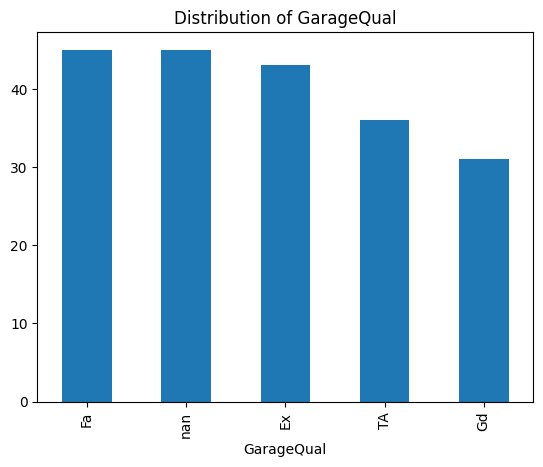

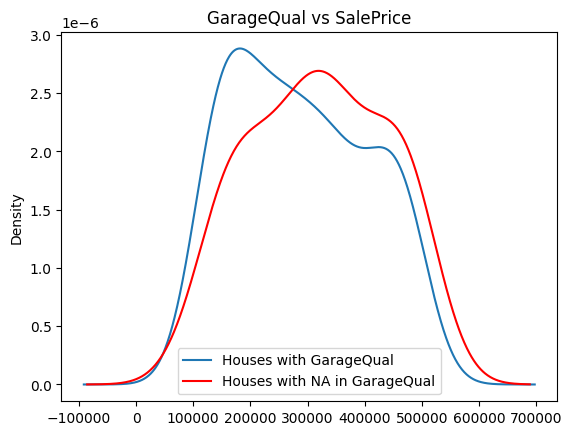


Processing Column: FireplaceQu


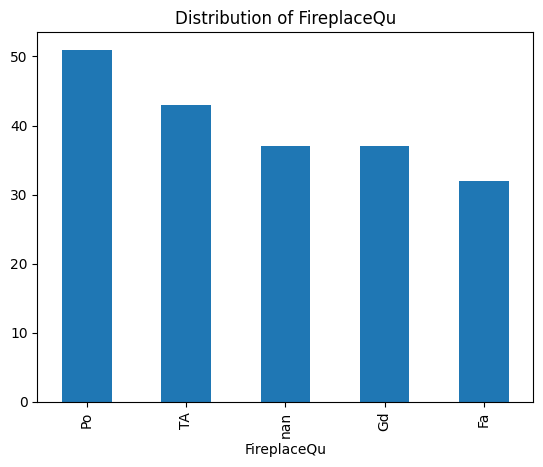

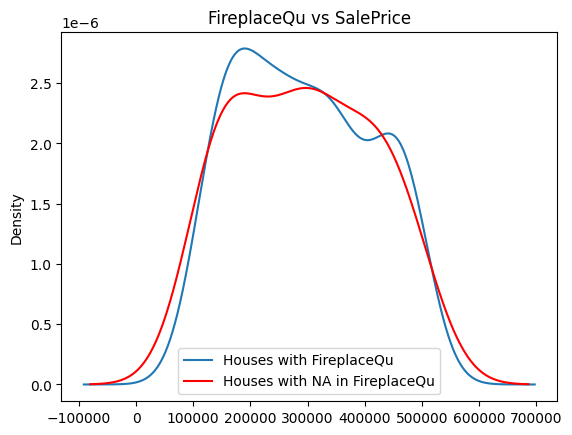

Mode of GarageQual: Fa
Mode of FireplaceQu: Po

Missing Data After Imputation:
 HouseType         0
GarageQual        0
FireplaceQu       0
OverallQuality    0
SalePrice         0
dtype: int64

Imputer Statistics (Most Frequent Values): ['Villa' 'Fa' 'Po' 5]

Processed Training Data (First 5 Rows):
   HouseType GarageQual FireplaceQu OverallQuality
0  Townhouse         Gd          Po              7
1  Townhouse         Fa          Fa              6
2  Apartment         Ex          Fa              7
3  Townhouse         Gd          Po              7
4      Condo         Fa          TA              5


<ipython-input-6-4bc49a06feb1>:78: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Step 1: Create a Custom Dataset
np.random.seed(42)  # For reproducibility
num_rows = 200  # Number of rows in the dataset

# Generate random data
data = {
    'HouseType': np.random.choice(['Apartment', 'Condo', 'Villa', 'Townhouse'], size=num_rows),
    'GarageQual': np.random.choice(['TA', 'Gd', 'Ex', 'Fa'], size=num_rows),
    'FireplaceQu': np.random.choice(['Gd', 'TA', 'Fa', 'Po'], size=num_rows),
    'OverallQuality': np.random.randint(1, 10, size=num_rows),  # Numerical feature
    'SalePrice': np.random.uniform(100000, 500000, size=num_rows).round(2)  # Target variable
}

# Introduce missing values randomly
def introduce_missing_values(df, columns, missing_percentage):
    """
    Introduces missing values into specified columns of a dataframe.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        columns (list): List of column names to introduce missing values.
        missing_percentage (float): Percentage of missing values to introduce (0-100).

    Returns:
        pd.DataFrame: Dataframe with missing values.
    """
    for col in columns:
        mask = np.random.rand(len(df)) < (missing_percentage / 100)
        df.loc[mask, col] = np.nan
    return df

# Create the dataframe
df = pd.DataFrame(data)

# Specify columns to introduce missing values and the percentage of missingness
columns_with_missing = ['GarageQual', 'FireplaceQu']
missing_percentage = 20  # 20% missing values

# Apply the function to introduce missing values
df = introduce_missing_values(df, columns_with_missing, missing_percentage)

# Display the first few rows of the dataset
print("Generated Dataset:")
print(df.head())

# Step 2: Analyze Missing Data
missing_percent = df.isnull().mean() * 100
print("\nMissing Data Percentage:\n", missing_percent)

# Step 3: Visualize Distributions
for col in columns_with_missing:
    print(f"\nProcessing Column: {col}")

    # Bar plot for categorical distribution
    df[col].value_counts(dropna=False).plot(kind='bar', title=f'Distribution of {col}')
    plt.show()

    # KDE plot for target variable (SalePrice)
    fig, ax = plt.subplots()
    if df[col].notnull().any():
        df[df[col].notnull()]['SalePrice'].plot(kind='kde', ax=ax, label=f'Houses with {col}')
    if df[col].isnull().any():
        df[df[col].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red', label=f'Houses with NA in {col}')
    ax.legend()
    plt.title(f'{col} vs SalePrice')
    plt.show()

# Step 4: Impute Missing Values
for col in columns_with_missing:
    mode_value = df[col].mode()[0]
    print(f"Mode of {col}: {mode_value}")
    df[col].fillna(mode_value, inplace=True)

# Verify missing values are handled
print("\nMissing Data After Imputation:\n", df.isnull().sum())

# Step 5: Train-Test Split and Modeling Preparation
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SimpleImputer for consistency (even though missing values are already handled)
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Check imputer statistics
print("\nImputer Statistics (Most Frequent Values):", imputer.statistics_)

# Final Processed Data
print("\nProcessed Training Data (First 5 Rows):")
print(pd.DataFrame(X_train, columns=X.columns).head())